In [175]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.stats as stats

import scipy
import pywt
import mne
from mne.decoding import CSP
import math

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
from stats_utils import *
import glob
import os


import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [324]:
sub = '15'
reject_criteria = dict(eeg=100e-6) 


eps_post = mne.read_epochs(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz/listen_epochs_pre_{sub}.fif')
eps_post.drop_bad(reject = reject_criteria)
eps_post_data = eps_post.get_data()[:, 0:64, :]




eps_pre = mne.read_epochs(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data_n05to05_30Hz/motor_epochs_pre_{sub}.fif')
eps_pre.drop_bad(reject = reject_criteria)
eps_pre_data = eps_pre.get_data()[:, 0:64, :]

eps_data = np.vstack([eps_pre_data, eps_post_data])

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz/listen_epochs_pre_15.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2']
3 bad epochs dropped
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data_n05to05_30Hz/motor_epochs_pre_15.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
426 matching events found
No baseline correction applied
0 projection items activated
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch 

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_59862/2043276382.py:5: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz/listen_epochs_pre_15.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  eps_post = mne.read_epochs(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05_30Hz/listen_epochs_pre_{sub}.fif')
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_59862/2043276382.py:12: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data_n05to05_30Hz/motor_epochs_pre_15.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  eps_pre = mne.read_epochs(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_

    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
12 bad epochs dropped


In [325]:
labels_pre = eps_pre.events[:, -1]-1
labels_post = eps_post.events[:,-1]
labels = np.concatenate([labels_pre, labels_post])

In [326]:
labels.shape


(739,)

In [1]:
csp

NameError: name 'csp' is not defined

In [327]:
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
csp.fit_transform(eps_data, labels)

Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 64 dim * 7.1e+09  max singular value)


    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.6e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.


array([[-3.08244624e+01,  7.28972608e-03, -3.29434064e+01,
        -3.18824620e+01],
       [-3.10733950e+01,  1.05838419e-01, -3.32907624e+01,
        -3.19364661e+01],
       [-3.11903033e+01, -4.56053471e-02, -3.28440575e+01,
        -3.18599527e+01],
       ...,
       [ 1.99435686e-01, -3.28565756e+01,  4.30371593e-01,
         2.00727647e-01],
       [-6.32516640e-02, -3.30548609e+01, -2.33295369e-01,
        -4.84550337e-01],
       [-3.99992974e-02, -3.35591035e+01,  3.79946084e-01,
         3.40168698e-01]])

In [328]:
ch_names_64, _ = load_channels()
eeg_ch_names = ch_names_64
new_info = mne.pick_info(eps_post.info, sel=[eps_post.info['ch_names'].index(ch) for ch in eeg_ch_names])

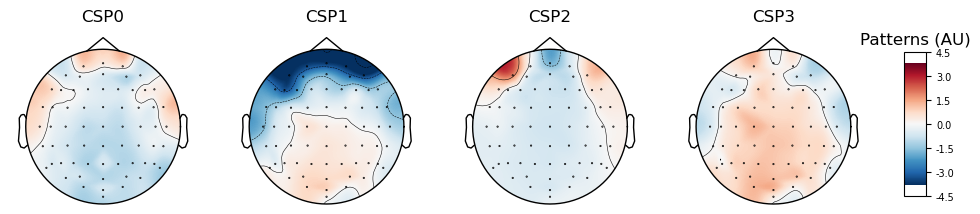

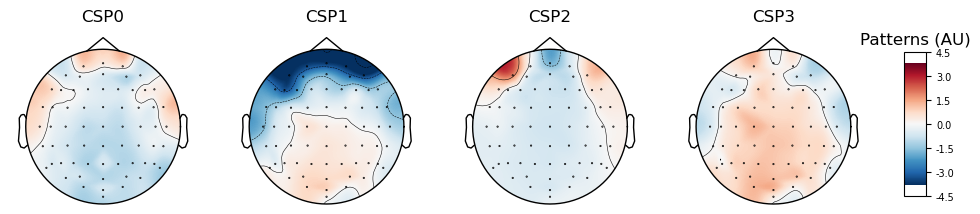

In [329]:
csp.plot_patterns(new_info, ch_type="eeg", units="Patterns (AU)", size=1.5)

In [330]:
eigenvalues = csp.filters_  # Spatial filters (ordered by importance)
print(eigenvalues)


[[ 367461.97201194 -421667.5158905   248060.87811561 ...  258003.09757134
   -26452.51235918   -2007.14268407]
 [ -65779.82330516  -89852.73073596  -39396.8629926  ...   45643.36255876
   -13877.14155428    7591.3926315 ]
 [ -14832.8907842   194041.52613337  -34100.74985156 ...   10684.67916913
   -15017.54684435    2120.78563448]
 ...
 [  15274.89644037  -19289.60049907   18993.53010957 ...   -9883.5936563
  -134280.45988365    2701.50089657]
 [  26365.53143951  -37329.84616477   55752.84844552 ...  -97044.69372873
   -24147.63398792    7324.22188675]
 [  -6089.91626508   -5471.73010436   15346.12795086 ...  103568.28160026
   -15227.74279069    3003.92814753]]
